# Practice Model: A Simple Starter
### Building a GP where 

$
\begin{align}
\Delta \nu \sim \mathcal{GP}(f(mass), k(mass,mass^{\prime}))
\end{align}
$

We'll start out by using `numpy` as a test to prove to ourselves that we understand GP implementations in general.

> We are looking for the functional form so that we can implement the likelihood calculation later.  
The independent parameter is mass and the observed is $\Delta$$\nu$

***

### Some assumptions
In the first place, since this is a "simple" starter model, we can make some decisions before we even start to guide the process of implementing the model. Let's start with a fairly common GP, where the mean function is zero and the covariance function is a squared exponential. Why? Because that's where everyone starts from.

This squared exponential says that values of $mass$ and $mass^\prime$ that are close to each other result in values of $k$ closer to 1. This ends up looking like a diagonal covariance matrix. 

Let's talk about why that makes sense -HERE-

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Our observed value is $\Delta$$\nu$ - for now we'll call it `Dnu` for ease of typing  
Our independent parameter is `mass` - this is a perfectly fine variable name, but remember that if you're following a tutorial for more complicated GP implementations, it's likely to be called $x$ 

Let's have a look at the dataset given:

In [6]:
data = np.loadtxt('./Lindsey_version1.csv', delimiter=',', skiprows=1)
Dnu = data[:,1]
mass = data [:, 0]

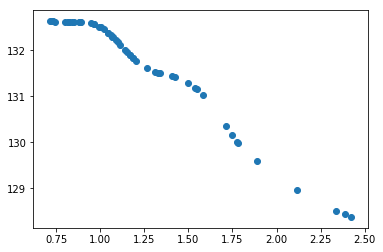

In [7]:
fig, ax = plt.subplots()
ax.scatter(mass, Dnu)

What we think we see in this plot is a relationship between stellar mass and observed $\Delta$$\nu$.  
That is, this plot looks like it's trying to inform us that the large frequency separation decreases as stellar mass increases  
It's also a really bad looking plot, but `TODO`: fix it later  

*** 

Our goal is to try to find a good (even if it's wrong) posterior estimate of the functional form.  
Posterior estimate: "the shaded region" <- what I think of as 'the area under the curve' except it's a space shaped by the mean function, constrained by observed points, and bounded by the standard deviation

### Some useful definitions before we move on:
##### Hyperparameter:
parameters of the covariance function; $\theta$ is often used to represent this in formulae

##### Overfitting/Overfitted Model:
a statistical model that contains more parameters than are justified by the data; a model that "memorizes" training data instead of "learning" a trend

##### Placeholer:
some thing that I would benefit from having a definition that's easy to flip back to in moments of foggy understanding